In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
!pip install dython
from dython.nominal import associations
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
df=pd.read_csv("/content/drive/MyDrive/Dataset/chronickidneydisease (2).csv")
df

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,395,55.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,...,47,6700,4.9,no,no,no,good,no,no,notckd
396,396,42.0,70.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,54,7800,6.2,no,no,no,good,no,no,notckd
397,397,12.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,...,49,6600,5.4,no,no,no,good,no,no,notckd
398,398,17.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,51,7200,5.9,no,no,no,good,no,no,notckd


In [5]:
#EXPLORATORY DATA ANALYSIS

In [6]:
df.duplicated().sum()

0

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             391 non-null    float64
 2   bp              388 non-null    float64
 3   sg              353 non-null    float64
 4   al              354 non-null    float64
 5   su              351 non-null    float64
 6   rbc             248 non-null    object 
 7   pc              335 non-null    object 
 8   pcc             396 non-null    object 
 9   ba              396 non-null    object 
 10  bgr             356 non-null    float64
 11  bu              381 non-null    float64
 12  sc              383 non-null    float64
 13  sod             313 non-null    float64
 14  pot             312 non-null    float64
 15  hemo            348 non-null    float64
 16  pcv             330 non-null    object 
 17  wc              295 non-null    obj

In [8]:
def convert_dtype(df,feature):
    df[feature]=pd.to_numeric(df[feature],errors='coerce')


In [9]:
features=['pcv','wc','rc']
for i in features:
    convert_dtype(df,i)

In [10]:
#CHECKING THE CKD AND NN CKD

<AxesSubplot:xlabel='age', ylabel='classification'>

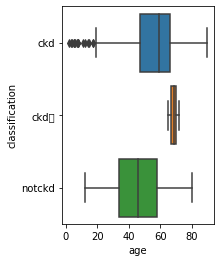

In [11]:
plt.subplot(1,2,1)
sns.boxplot(x=df['age'],y=df['classification'])

In [12]:
def extract_cat_num(kidney):
    cat_col=[col for col in kidney.columns if kidney[col].dtype=='O']
    num_col=[col for col in kidney.columns if kidney[col].dtype!='O']
    return cat_col,num_col

In [13]:
cat_col,num_col=extract_cat_num(df)

In [14]:
#Analysing distribution of each and every column

In [15]:

len(num_col)

15

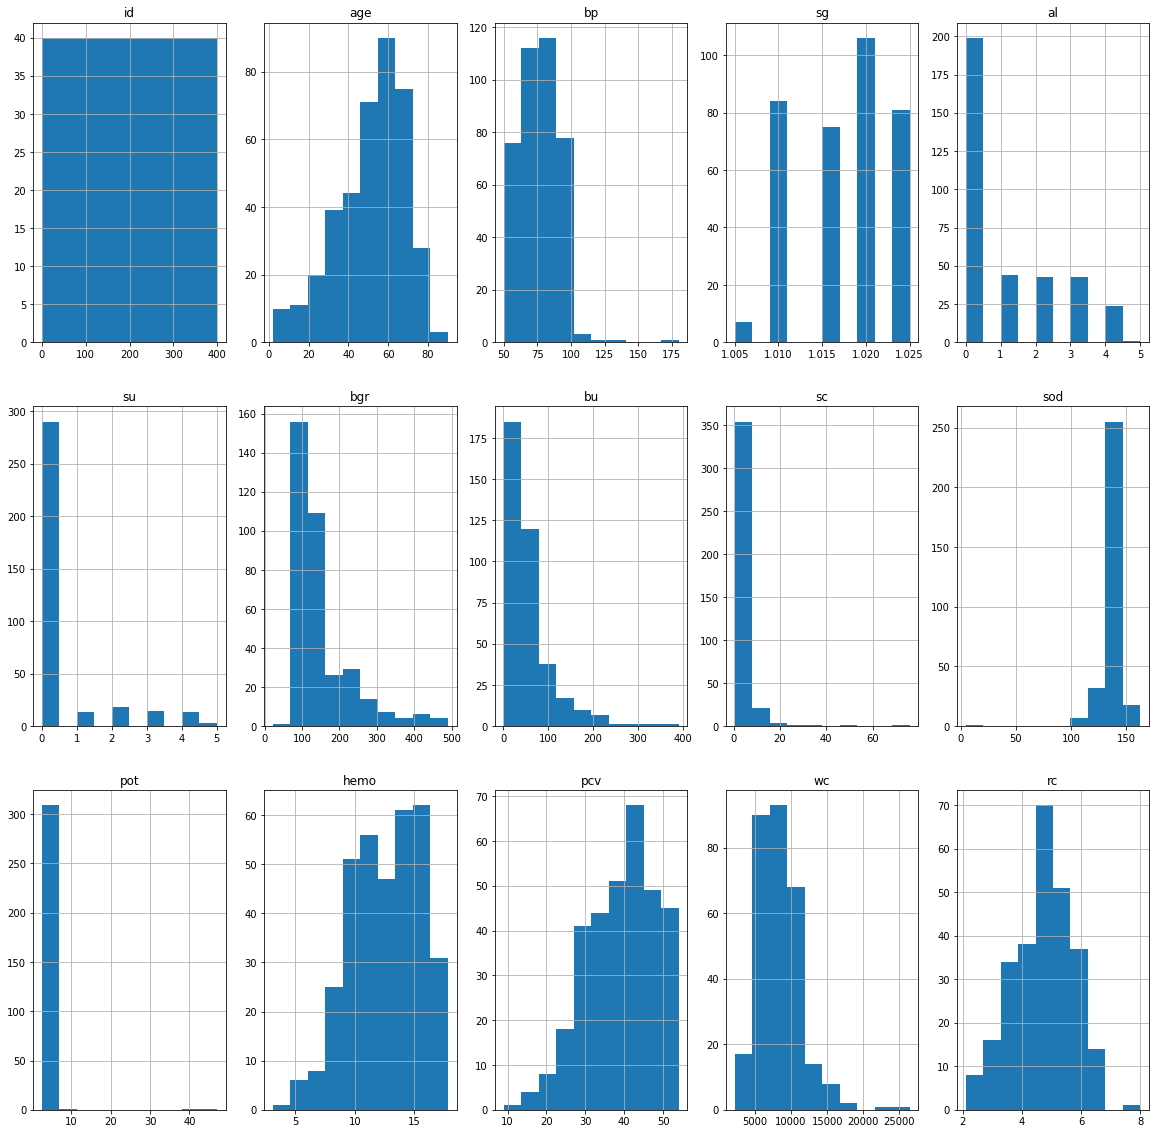

In [16]:
plt.figure(figsize=(20,20))
for i,feature in enumerate(num_col):
    plt.subplot(3,5,i+1)      
    df[feature].hist()
    plt.title(feature)

In [17]:
#Check distribution of categorical Data

In [18]:
len(cat_col)

11

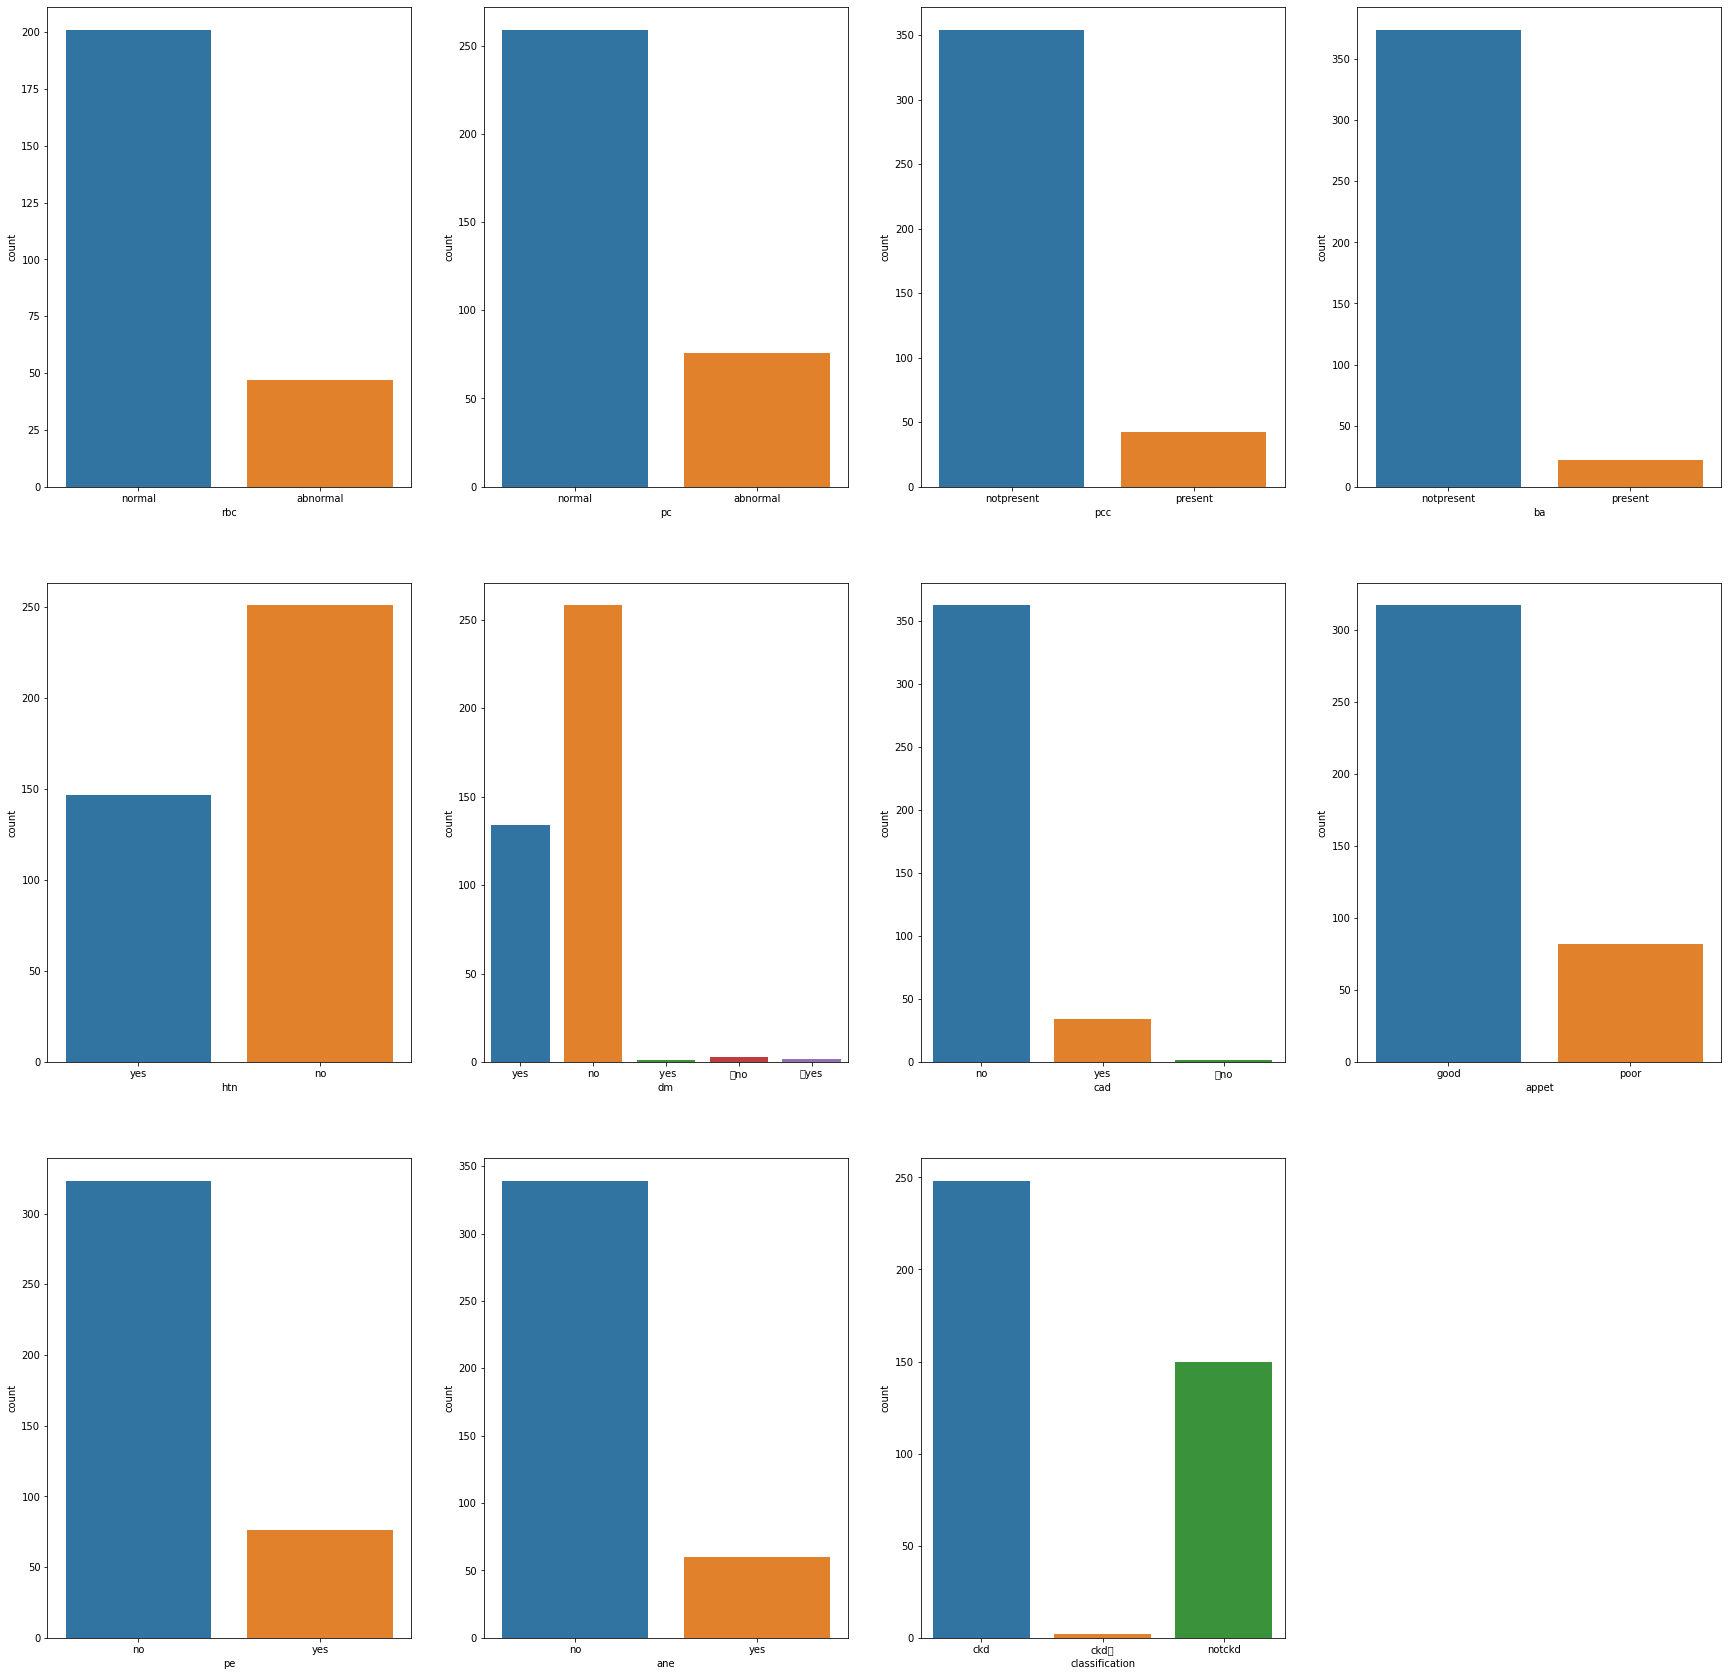

In [19]:
plt.figure(figsize=(30,30))

for i,feature in enumerate(cat_col):
    plt.subplot(3,4,i+1)
    sns.countplot(df[feature])

In [20]:
df.groupby(['rbc','classification'])['rc'].agg(['count','mean','median','min','max'])

count      mean  median  min  max
rbc      classification                                   
abnormal ckd                25  3.832000     3.7  2.5  5.6
normal   ckd                40  3.782500     3.8  2.1  8.0
         ckd\t               0       NaN     NaN  NaN  NaN
         notckd            134  5.368657     5.3  4.4  6.5

In [21]:
#Relationship between haemoglobin and packed cell volume

Text(0.5, 1.0, 'Relationship between haemoglobin and packed cell volume')

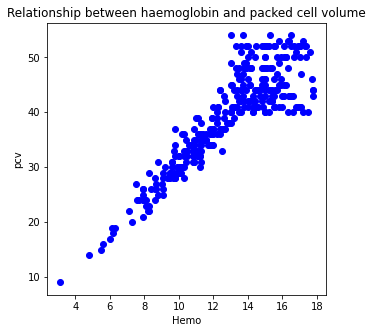

In [22]:
plt.figure(figsize=(5,5))
plt.scatter(x=df.hemo,y=df['pcv'],color="blue")
plt.xlabel('Hemo')
plt.ylabel('pcv')
plt.title('Relationship between haemoglobin and packed cell volume')

In [23]:
#Analyse distribution of red blood cell count chronic as well as non chronic

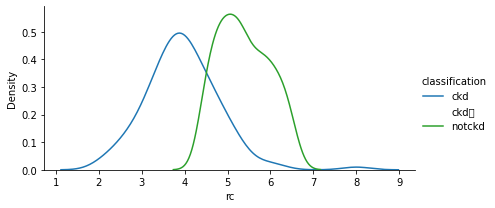

In [24]:
grid=sns.FacetGrid(df,hue='classification',aspect=2)
grid.map(sns.kdeplot,'rc')
grid.add_legend()

Text(0.5, 1.0, 'Relationship between haemoglobin and red blood cell count')

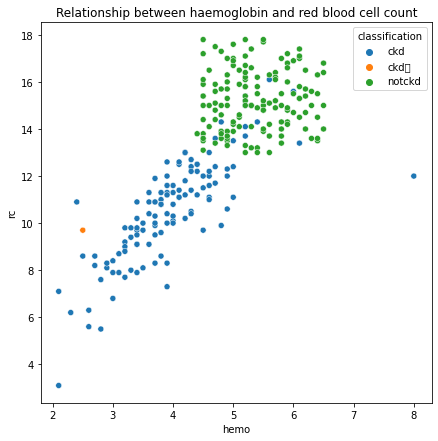

In [25]:
plt.figure(figsize=(7,7))
sns.scatterplot(x=df['rc'],y=df['hemo'],hue=df['classification'])
plt.xlabel('hemo')
plt.ylabel('rc')
plt.title('Relationship between haemoglobin and red blood cell count')

In [26]:
#CORRELATION

In [27]:
from dython.nominal import identify_nominal_columns
categorical_features=identify_nominal_columns(df)
categorical_features

['rbc',
 'pc',
 'pcc',
 'ba',
 'htn',
 'dm',
 'cad',
 'appet',
 'pe',
 'ane',
 'classification']

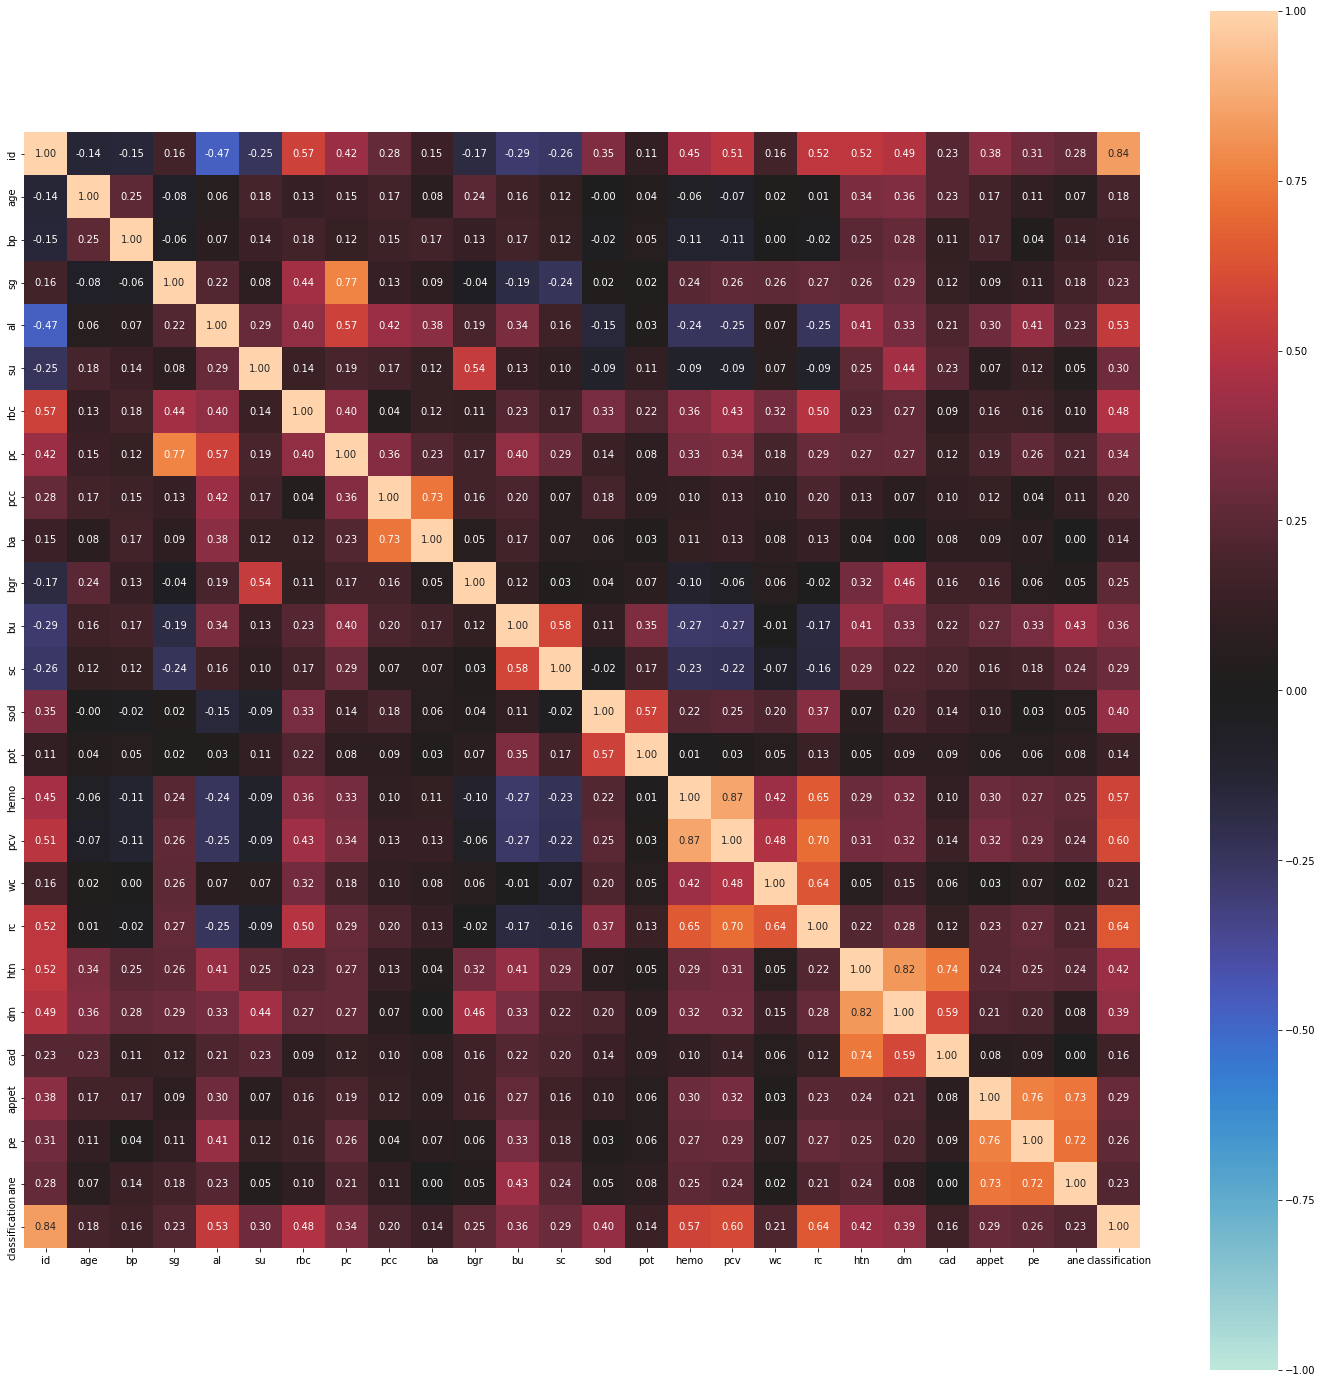

In [30]:
complete_correlation= associations(df, filename= 'complete_correlation.png', figsize=(25,25))

In [31]:
#COMPLETE CORRELATION DATASET

In [32]:
df_complete_corr=complete_correlation['corr']
df_complete_corr.dropna(axis=1, how='all').dropna(axis=0, how='all').style.background_gradient(cmap='nipy_spectral_r', axis=None).set_precision(2)


,id,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
id,1.00,-0.14,-0.15,0.16,-0.47,-0.25,0.57,0.42,0.28,0.15,-0.17,-0.29,-0.26,0.35,0.11,0.45,0.51,0.16,0.52,0.52,0.49,0.23,0.38,0.31,0.28,0.84
age,-0.14,1.00,0.25,-0.08,0.06,0.18,0.13,0.15,0.17,0.08,0.24,0.16,0.12,-0.00,0.04,-0.06,-0.07,0.02,0.01,0.34,0.36,0.23,0.17,0.11,0.07,0.18
bp,-0.15,0.25,1.00,-0.06,0.07,0.14,0.18,0.12,0.15,0.17,0.13,0.17,0.12,-0.02,0.05,-0.11,-0.11,0.00,-0.02,0.25,0.28,0.11,0.17,0.04,0.14,0.16
sg,0.16,-0.08,-0.06,1.00,0.22,0.08,0.44,0.77,0.13,0.09,-0.04,-0.19,-0.24,0.02,0.02,0.24,0.26,0.26,0.27,0.26,0.29,0.12,0.09,0.11,0.18,0.23
al,-0.47,0.06,0.07,0.22,1.00,0.29,0.40,0.57,0.42,0.38,0.19,0.34,0.16,-0.15,0.03,-0.24,-0.25,0.07,-0.25,0.41,0.33,0.21,0.30,0.41,0.23,0.53
su,-0.25,0.18,0.14,0.08,0.29,1.00,0.14,0.19,0.17,0.12,0.54,0.13,0.10,-0.09,0.11,-0.09,-0.09,0.07,-0.09,0.25,0.44,0.23,0.07,0.12,0.05,0.30
rbc,0.57,0.13,0.18,0.44,0.40,0.14,1.00,0.40,0.04,0.12,0.11,0.23,0.17,0.33,0.22,0.36,0.43,0.32,0.50,0.23,0.27,0.09,0.16,0.16,0.10,0.48
pc,0.42,0.15,0.12,0.77,0.57,0.19,0.40,1.00,0.36,0.23,0.17,0.40,0.29,0.14,0.08,0.33,0.34,0.18,0.29,0.27,0.27,0.12,0.19,0.26,0.21,0.34
pcc,0.28,0.17,0.15,0.13,0.42,0.17,0.04,0.36,1.00,0.73,0.16,0.20,0.07,0.18,0.09,0.10,0.13,0.10,0.20,0.13,0.07,0.10,0.12,0.04,0.11,0.20
ba,0.15,0.08,0.17,0.09,0.38,0.12,0.12,0.23,0.73,1.00,0.05,0.17,0.07,0.06,0.03,0.11,0.13,0.08,0.13,0.04,0.00,0.08,0.09,0.07,0.00,0.14


In [33]:
df.corr().style.background_gradient(cmap="nipy_spectral_r")

,id,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc
id,1.000000,-0.185308,-0.245744,0.642156,-0.541993,-0.283416,-0.338673,-0.307175,-0.268683,0.364251,-0.092347,0.640298,0.630019,-0.198641,0.605072
age,-0.185308,1.000000,0.159480,-0.191096,0.122091,0.220866,0.244992,0.196985,0.132531,-0.100046,0.058377,-0.192928,-0.242119,0.118339,-0.268896
bp,-0.245744,0.159480,1.000000,-0.218836,0.160689,0.222576,0.160193,0.188517,0.146222,-0.116422,0.075151,-0.306540,-0.326319,0.029753,-0.261936
sg,0.642156,-0.191096,-0.218836,1.000000,-0.469760,-0.296234,-0.374710,-0.314295,-0.361473,0.412190,-0.072787,0.602582,0.603560,-0.236215,0.579476
al,-0.541993,0.122091,0.160689,-0.469760,1.000000,0.269305,0.379464,0.453528,0.399198,-0.459896,0.129038,-0.634632,-0.611891,0.231989,-0.566437
su,-0.283416,0.220866,0.222576,-0.296234,0.269305,1.000000,0.717827,0.168583,0.223244,-0.131776,0.219450,-0.224775,-0.239189,0.184893,-0.237448
bgr,-0.338673,0.244992,0.160193,-0.374710,0.379464,0.717827,1.000000,0.143322,0.114875,-0.267848,0.066966,-0.306189,-0.301385,0.150015,-0.281541
bu,-0.307175,0.196985,0.188517,-0.314295,0.453528,0.168583,0.143322,1.000000,0.586368,-0.323054,0.357049,-0.610360,-0.607621,0.050462,-0.579087
sc,-0.268683,0.132531,0.146222,-0.361473,0.399198,0.223244,0.114875,0.586368,1.000000,-0.690158,0.326107,-0.401670,-0.404193,-0.006390,-0.400852
sod,0.364251,-0.100046,-0.116422,0.412190,-0.459896,-0.131776,-0.267848,-0.323054,-0.690158,1.000000,0.097887,0.365183,0.376914,0.007277,0.344873


In [34]:
df=df.drop(["id"],axis=1)

In [35]:
df=df.drop(["age"],axis=1)

In [36]:
df=df.drop(["wc"],axis=1)

In [37]:
df.columns

Index(['bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr', 'bu', 'sc',
       'sod', 'pot', 'hemo', 'pcv', 'rc', 'htn', 'dm', 'cad', 'appet', 'pe',
       'ane', 'classification'],
      dtype='object')

In [38]:
#DESCRIPTIVE STATISTICS

In [39]:
df.describe()

,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo,pcv,rc
count,388.000000,353.000000,354.000000,351.000000,356.000000,381.000000,383.000000,313.000000,312.000000,348.000000,329.000000,269.000000
mean,76.469072,1.017408,1.016949,0.450142,148.036517,57.425722,3.072454,137.528754,4.627244,12.526437,38.884498,4.707435
std,13.683637,0.005717,1.352679,1.099191,79.281714,50.503006,5.741126,10.408752,3.193904,2.912587,8.990105,1.025323
min,50.000000,1.005000,0.000000,0.000000,22.000000,1.500000,0.400000,4.500000,2.500000,3.100000,9.000000,2.100000
25%,70.000000,1.010000,0.000000,0.000000,99.000000,27.000000,0.900000,135.000000,3.800000,10.300000,32.000000,3.900000
50%,80.000000,1.020000,0.000000,0.000000,121.000000,42.000000,1.300000,138.000000,4.400000,12.650000,40.000000,4.800000
75%,80.000000,1.020000,2.000000,0.000000,163.000000,66.000000,2.800000,142.000000,4.900000,15.000000,45.000000,5.400000
max,180.000000,1.025000,5.000000,5.000000,490.000000,391.000000,76.000000,163.000000,47.000000,17.800000,54.000000,8.000000


In [40]:
#NULL VALUES

In [41]:
missing_values=df.columns[df.isnull().any()]
df[missing_values].isnull().sum()

bp        12
sg        47
al        46
su        49
rbc      152
pc        65
pcc        4
ba         4
bgr       44
bu        19
sc        17
sod       87
pot       88
hemo      52
pcv       71
rc       131
htn        2
dm         2
cad        2
appet      1
pe         1
ane        1
dtype: int64

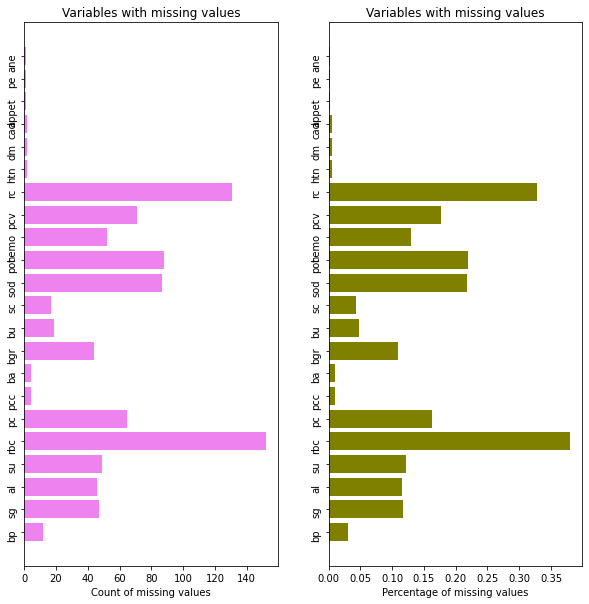

In [43]:
labels = []
valuecount = []
percentcount = []
for col in missing_values:
    labels.append(col)
    valuecount.append(df[col].isnull().sum())
    percentcount.append(df[col].isnull().sum()/df.shape[0]) 
ind = np.arange(len(labels))
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(10,10))
rects = ax1.barh(ind, np.array(valuecount), color='violet')
ax1.set_yticks(ind)
ax1.set_yticklabels(labels, rotation='vertical')
ax1.set_xlabel("Count of missing values")
ax1.set_title("Variables with missing values");
rects = ax2.barh(ind, np.array(percentcount), color='olive')
ax2.set_yticks(ind)
ax2.set_yticklabels(labels, rotation='vertical')
ax2.set_xlabel("Percentage of missing values")
ax2.set_title("Variables with missing values");

In [44]:
print("Total count of missing value in a dataset:",df.isnull().sum().sum() )

Total count of missing value in a dataset: 897


In [47]:
#HANDLING NULL VALUES

In [48]:
df['bp'] = df['bp'].fillna(df['bp'].mean())
df["bp"].isnull().sum()

0

In [49]:
df['sg'] = df['sg'].fillna(df['sg'].mean())
df["sg"].isnull().sum()

0

In [50]:
df['al'] = df['al'].fillna(df['al'].mean())
df["al"].isnull().sum()

0

In [51]:
df['su'] = df['su'].fillna(df['su'].mean())
df["su"].isnull().sum()

0

In [52]:
df['rbc'] = df['rbc'].fillna("not mentioned")
df["rbc"].isnull().sum()

0

In [53]:
df['pc'] = df['pc'].fillna(df['pc'].mode()[0])
df["pc"].isnull().sum()

0

In [54]:
df = df.dropna(axis=0, subset=['pcc',"htn","appet"])

In [55]:
df['bgr'] = df['al'].fillna(df['al'].mean())
df["bgr"].isnull().sum()

0

In [56]:
df['bu'] = df['bu'].fillna(df['bu'].mean())
df["bu"].isnull().sum()


0

In [57]:
df['sc'] = df['sc'].fillna(df['sc'].mean())
df['sod'] = df['sod'].fillna(df['sod'].mean())

In [58]:
df['pot'] = df['pot'].fillna(df['pot'].mean())
df['pcv'] = df['pcv'].fillna(df['pcv'].mode()[0])
df['hemo'] = df['hemo'].fillna(df['hemo'].mean())

In [59]:
df['rc'] = df['rc'].fillna("not mentioned")
df["rc"].isnull().sum()

0

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 393 entries, 0 to 399
Data columns (total 23 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   bp              393 non-null    float64
 1   sg              393 non-null    float64
 2   al              393 non-null    float64
 3   su              393 non-null    float64
 4   rbc             393 non-null    object 
 5   pc              393 non-null    object 
 6   pcc             393 non-null    object 
 7   ba              393 non-null    object 
 8   bgr             393 non-null    float64
 9   bu              393 non-null    float64
 10  sc              393 non-null    float64
 11  sod             393 non-null    float64
 12  pot             393 non-null    float64
 13  hemo            393 non-null    float64
 14  pcv             393 non-null    float64
 15  rc              393 non-null    object 
 16  htn             393 non-null    object 
 17  dm              393 non-null    obj

In [61]:
df.isnull().sum()

bp                0
sg                0
al                0
su                0
rbc               0
pc                0
pcc               0
ba                0
bgr               0
bu                0
sc                0
sod               0
pot               0
hemo              0
pcv               0
rc                0
htn               0
dm                0
cad               0
appet             0
pe                0
ane               0
classification    0
dtype: int64

In [62]:
#HANDLING CATEGORICAL DATA

In [72]:
for column in df:
     if (df[column].dtype=="object"):
        print("\n",column)
        print(df[column].value_counts(),"\n")


 rbc
normal           195
not mentioned    151
abnormal          47
Name: rbc, dtype: int64 


 pc
normal      317
abnormal     76
Name: pc, dtype: int64 


 pcc
notpresent    351
present        42
Name: pcc, dtype: int64 


 ba
notpresent    371
present        22
Name: ba, dtype: int64 


 rc
not mentioned    131
5.2               16
4.5               16
4.9               14
4.7               11
4.8               10
3.9               10
5.0               10
4.6                9
3.4                9
6.1                8
3.7                8
5.5                8
5.3                7
5.4                7
5.9                7
3.8                7
4.3                6
4.2                6
4.0                6
5.6                6
6.4                5
3.2                5
5.7                5
5.8                5
6.2                5
4.4                5
4.1                5
5.1                4
6.3                4
6.0                4
3.6                4
6.5                4
3.0        

In [73]:
for column in df:
     if (df[column].dtype=="object"):
        print("\n",column)
        print(df[column].value_counts(),"\n")


 rbc
normal           195
not mentioned    151
abnormal          47
Name: rbc, dtype: int64 


 pc
normal      317
abnormal     76
Name: pc, dtype: int64 


 pcc
notpresent    351
present        42
Name: pcc, dtype: int64 


 ba
notpresent    371
present        22
Name: ba, dtype: int64 


 rc
not mentioned    131
5.2               16
4.5               16
4.9               14
4.7               11
4.8               10
3.9               10
5.0               10
4.6                9
3.4                9
6.1                8
3.7                8
5.5                8
5.3                7
5.4                7
5.9                7
3.8                7
4.3                6
4.2                6
4.0                6
5.6                6
6.4                5
3.2                5
5.7                5
5.8                5
6.2                5
4.4                5
4.1                5
5.1                4
6.3                4
6.0                4
3.6                4
6.5                4
3.0        

In [74]:
#LABEL ENCODING

In [75]:
objList = df.select_dtypes(include = "object").columns
print (objList)

Index(['rbc', 'pc', 'pcc', 'ba', 'rc', 'htn', 'dm', 'cad', 'appet', 'pe',
       'ane', 'classification'],
      dtype='object')


In [76]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for feat in objList:
    df[feat] = le.fit_transform(df[feat].astype(str))

print (df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 393 entries, 0 to 399
Data columns (total 23 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   bp              393 non-null    float64
 1   sg              393 non-null    float64
 2   al              393 non-null    float64
 3   su              393 non-null    float64
 4   rbc             393 non-null    int64  
 5   pc              393 non-null    int64  
 6   pcc             393 non-null    int64  
 7   ba              393 non-null    int64  
 8   bgr             393 non-null    float64
 9   bu              393 non-null    float64
 10  sc              393 non-null    float64
 11  sod             393 non-null    float64
 12  pot             393 non-null    float64
 13  hemo            393 non-null    float64
 14  pcv             393 non-null    float64
 15  rc              393 non-null    int64  
 16  htn             393 non-null    int64  
 17  dm              393 non-null    int

In [77]:
df.dtypes

bp                float64
sg                float64
al                float64
su                float64
rbc                 int64
pc                  int64
pcc                 int64
ba                  int64
bgr               float64
bu                float64
sc                float64
sod               float64
pot               float64
hemo              float64
pcv               float64
rc                  int64
htn                 int64
dm                  int64
cad                 int64
appet               int64
pe                  int64
ane                 int64
classification      int64
dtype: object

In [79]:
#MODEL RANDOM FOREST

In [80]:
X = df.drop(['classification', 'sg',  'rc', 'pcv'], axis = 1)
y = df['classification']

In [81]:
X.columns

Index(['bp', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr', 'bu', 'sc', 'sod',
       'pot', 'hemo', 'htn', 'dm', 'cad', 'appet', 'pe', 'ane'],
      dtype='object')

In [83]:
from sklearn.model_selection import train_test_split

In [84]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [85]:
from sklearn.ensemble import RandomForestClassifier

In [86]:
model = RandomForestClassifier(n_estimators = 20)
model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=20)

In [87]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [88]:
confusion_matrix(y_test, model.predict(X_test))

array([[55,  2],
       [ 0, 22]])

In [90]:
print(f"Accuracy is {round(accuracy_score(y_test, model.predict(X_test))*100, 2)}%")

Accuracy is 97.47%


In [91]:
import pickle
pickle.dump(model, open('kidney.pkl', 'wb'))